# **Logistic Regression**

Logistic regression is to find a best line not to be a regression model, but used for classification. 
The formula of the two are the same.

<img src="img/regression.png" width="400"> <img src="img/logistic_regression.png" width="420">

### **How to find logistic regression line?**

<img src="img/logistic_regression_concept.png" width="600">

The goal is to find a parameter sets that satisfy  

$$\sigma(f(x)) = \begin{cases} 0 \quad f(x) < 0 \\ 1 \quad f(x) \neq 0 \end{cases} $$

Here are two concept used: simoid function and Bernoulli distribution.

#### **Sigmoid function**

The reason to use sigmoid is that the above condition is too strict and it is usually wrong classified if $f(x)$ is closed to $0$. Following is the equation of sigmoid function and also an example plot, from the plot can see that there is a gray area near $0$.

$$\sigma(f(x)) = \frac{1}{1+e^{-f(x)}}$$


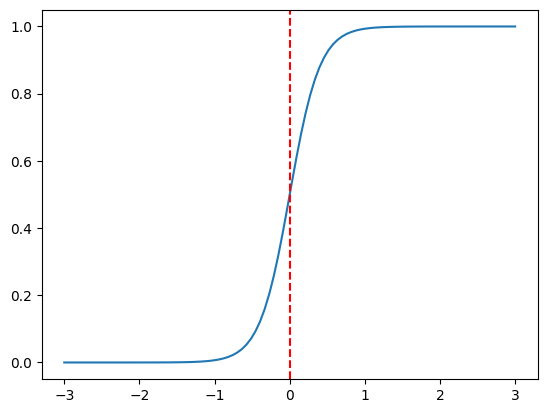

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
y = 1/(1 + np.exp(-5*x))
plt.plot(x, y)
plt.axvline(x = 0, color = 'r', linestyle = '--')
plt.show()

#### **Bernoulli Distribution**

$$f(x)=p^{x}(1-p)^{(1-x)}=\begin{cases}p \quad\quad\;\; if\ x=1 \\ 1-p \;\;\; if\ x=0 \end{cases}$$

How does this eqution related to logistic regression? The output of logistic regression is the probabiliy of positive or negative.  
Positive: $P(y=1|x)$
Negative: $P(y=0|x) = 1 - P(y=1|x)$  
which is the same as Bernoulli distribution.  

Then we can use MLE (Maximum Likelihood Estimation) to approach the parameter of logistic regression.  

$$L(\beta) = \prod_i^np_i^{y_i}(1-p_i)^{1-y_i}$$

To implify to calculation, we will use log loss to represent to loss.

$$\cal{L}\it(\beta) = \text(log)(\prod_i^np_i^{y_i}(1-p_i)^{1-y_i})=-\Sigma_i^n\text{log}(p_i^{y_i}(1-p_i)^{1-y_i})$$
$$=-\Sigma_i^n(y_i\text{log}p_i+(1-y_i)\text{log}(1-p_i))=-\Sigma_i^n(y_i\text{log}(\frac{p_i}{1-p_i})+\text{log}(1-p_i))$$

where $p_i=\frac{1}{1+e^{-\beta^Tx_i}}$

$$\text{log}(\frac{p_i}{1-p_i})=\text{log}(\frac{\frac{1}{1+e^{-\beta^Tx_i}}}{1-\frac{1}{1+e^{-\beta^Tx_i}}})=\text{log}e^{\beta^Tx_i}=\beta^Tx_i$$

$$\text{log}(1-p_i) = \text{log}(1-\frac{1}{1+e^{-\beta^Tx_i}})=-\text{log}(1+e^{\beta^Tx_i})$$

So we can more simplify the loss function as,

$$\cal{L}\it(\beta)=-\Sigma_i^n\lbrace y_i\beta^Tx_i-\text{log}(1+e^{\beta^Tx_i})\rbrace=\Sigma_i^n\lbrace\text{log}(1+e^{\beta^Tx_i})-y_i\beta^Tx_i\rbrace$$

With loss function, we can get derivate with repect to $\beta$ which is the value to update.

$$\frac{\partial{\cal{L}\it(\beta)}}{\partial{\beta}}=\frac{\partial{\Sigma_i^n(\text{log}(1+e^{\beta^Tx_i})-y_i\beta^Tx_i)}}{\partial{\beta}}$$
$$=\Sigma_i^n\lbrace\frac{1}{1+e^{\beta^Tx_i}}\times\frac{\partial{(1+e^{\beta^Tx_i})}}{\partial{\beta}}-y_ix_i\rbrace=\Sigma_i^n\lbrace\frac{e^{\beta^Tx_i}}{(1+e^{\beta^Tx_i})}x_i-y_ix_i\rbrace$$
$$=\Sigma_i^n\lbrace p_ix_i-y_ix_i\rbrace=\Sigma_i^n\lbrace (p_i-y_i)x_i\rbrace$$

$$\beta^{(t+1)}=\beta^{(t)}+\gamma\Sigma_i^n\lbrace (p_i-y_i)x_i\rbrace$$

In [ ]:
class LogisticRegression:
    def __init__(self, lr: float=0.01, epochs: int=1000, fit_intercept: bool=False, verbose: bool=True):
        """
        Args:
            lr (float): learning rate
            epochs (int): number of epochs
            fit_intercept (bool): whether to fit an intercept term in addition to the coefficients
            verbose (bool): whether to output loss after each epoch
        """
        self.lr = lr
        self.epochs = epochs
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def add_intercept(self, X: np.array) -> np.array:
        """Add intercept to the input data
        Args:
            X (np.array): input data
        Returns:
            np.array: input data with intercept
        """
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z: np.array) -> np.array:
        """Calculate the sigmoid function
        Args:
            z (np.array): input data
        Returns:
            np.array: sigmoid of the input data
        """
        return 1 / (1 + np.exp(-z) + 1e-10)
    
    def loss(self, h: np.array, y: np.array) -> float:
        """Calculate the loss function
        Args:
            h (np.array): predicted output of sigmoid function
            y (np.array): ground truth
        Returns:
            float: loss value
        """
        return np.sum(np.log(1 + np.exp(h)) - y * h)
    
    def fit(self, X: np.array, y: np.array):
        """Fit the model
        Args:
            X (np.array): input data
            y (np.array): ground truth
        """
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        self.losses = []

        for i in range(self.epochs):
            z = np.dot(X, self.theta)  ##f(x)=B^TX
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            self.losses.append(self.loss(h, y))

            if(self.verbose == True and i % 100 == 0):
                print(f'loss: {self.loss(h, y)} \t')

    def predict_prob(self, X: np.array) -> np.array:
        """Predict the probability of the input data
        Args:
            X (np.array): input data
        Returns:
            np.array: predicted probability
        """
        if self.fit_intercept:
            X = self.add_intercept(X)

        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X: np.array, threshold: int=0.5) -> np.array:
        """Predict the class of the input data
        Args:
            X (np.array): input data
            threshold (int): threshold for classification
        Returns:
            np.array: predicted class
        """
        return self.predict_prob(X) >= threshold

loss: 300.2050278020181 	
loss: 315.3819671547751 	
loss: 238.5920845498651 	
loss: 237.9927630307683 	
loss: 240.59951687255423 	
loss: 229.42136346054838 	
loss: 229.95005011259508 	
loss: 231.95254518223751 	
loss: 232.57305145932983 	
loss: 231.43306301178194 	


/var/folders/69/6ry3j72176v59y5slnc712gw0000gn/T/ipykernel_28746/3322667282.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z) + 1e-10)


Accuracy: 95 %


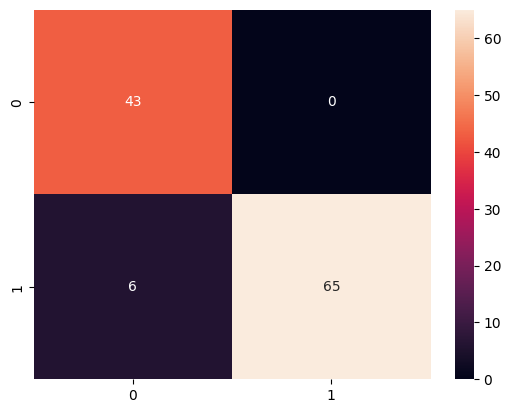

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lrg = LogisticRegression()
lrg.fit(X_train, y_train)
y_pred = lrg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, annot_kws={"size": 10})


acc = np.sum(y_test==y_pred)/len(y_pred)
print("Accuracy: {} %".format(round(acc*100),2))